# Introduction : KPMG Data Analysis virtual internship project

<b>Sprocket Central pvt. ltd. </b> is a client company for <b>KPMG AU</b> who provides their services to their customers and their products include bike hiring for various purposes and open to hiring for everyone belonging to every wealth segment. </br>
In this virtual internship from <b>Forage</b> there were 3 tasks given:

### Task 1: Data Quality Assessment
    - Assessment of data quality and completeness in preparation for analysis 
### Task 2: Data Insights
    - pointing out all the necessary steps for our data analytics.
### Task 3: Data Insights and Presentation
    - Using visualisations to present insights

## A KPMG Data Analysis virtual internship project </br>
In this project we need to identify various errors and inconsistencies and clean the dataset while pointing out the problems with the raw dataset and solving them.

I will be following the below mentioned steps for my data cleaning process :
1. checking data accuracy 
2. checking data completeness 
3. data consistency 
4. data currency 
5. data relevancy 
6. data validity (i.e., containing allowable values or not)
7. and lastly data uniqueness

In [21]:
import pandas as pd 
file = 'C:/Users/Bidee/Downloads/KPMG_VI_New_raw_data_update_final1.xlsx'
data = pd.ExcelFile(file)
print(data.sheet_names)

['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


In [22]:
transaction_raw = data.parse('Transactions',skiprows = 1)
customerDemo_raw = data.parse('CustomerDemographic',skiprows = 1)
cust_Address_raw = data.parse('CustomerAddress',skiprows = 1)
cust_list_raw = data.parse('NewCustomerList',skiprows = 1)

C:\Users\Bidee\AppData\Local\Temp\ipykernel_9556\850831179.py:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  cust_list_raw = data.parse('NewCustomerList',skiprows = 1)


In [23]:
# importing some necessary packages
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import seaborn as sns 
plt.style.use('ggplot')

In [24]:
transaction_raw.sample(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
9145,9146,4,2207,2017-09-21,1.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,2004-09-28
19378,19379,32,298,2017-12-19,0.0,Approved,Giant Bicycles,Standard,high,medium,1179.00,707.40,1997-08-25
4179,4180,47,2671,2017-08-05,0.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2006-10-01
19202,19203,0,1214,2017-06-17,0.0,Approved,Solex,Standard,medium,medium,441.49,84.99,1993-04-12
160,161,69,2381,2017-07-10,0.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,2015-04-11


In [25]:
transaction_raw.set_index('customer_id')

,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
customer_id,,,,,,,,,,,,
2950,1,2,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
3120,2,3,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
402,3,37,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3135,4,88,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
787,5,78,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,19996,51,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-21
127,19997,41,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1997-05-10
2284,19998,87,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-20


In [26]:
transaction_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

From the above info we can see there are missing data in the transaction dataframe

In [27]:
transaction_raw['online_order'].value_counts()
#since this is a categorical data basically stating that 0 = False and 1 = True for online orders
# so we're setting the datatype to category
# followed by same process for a few other columns 



1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [28]:
transaction_raw['order_status'].value_counts()


Approved     19821
Cancelled      179
Name: order_status, dtype: int64

so out of 20,000 entries 19,821 orders are approved (roughly 99.1% of the orders are approved) rest 179 are cancelled due to various reasons.

In [29]:
# converting these into categorical dtype 

In [30]:
transaction_raw['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [31]:
transaction_raw['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [32]:
transaction_raw['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [33]:
# all these can be classified as categorical data so like above converting them to categorical data. 
transaction_raw[['product_size','product_line','product_class','order_status','online_order']] = transaction_raw[['product_size','product_line','product_class','order_status','online_order']].astype('category')

In [34]:
transaction_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  category      
 5   order_status             20000 non-null  category      
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  category      
 8   product_class            19803 non-null  category      
 9   product_size             19803 non-null  category      
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

all the categorical data has been converted from object to category. </br>
Now what we are going to do is visualize the missing values and analyse further .

In [35]:
transaction_raw['list_price'].describe()

count    20000.000000
mean      1107.829449
std        582.825242
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64

In [36]:
transaction_raw['standard_cost'].describe()

count    19803.000000
mean       556.046951
std        405.955660
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1759.850000
Name: standard_cost, dtype: float64

The list_price and standard_cost columns contains the price at which it was sold and that item's standard price , </br >
max standard_cost is 1759.85 whereas that of list_price is 2091.47. none of these contain any incorrect data.

In [37]:
# lastly the product_first_sold_date column

transaction_raw['product_first_sold_date'].sample(10)

10399   2010-08-20
813     1997-08-25
5404    2002-03-22
2265    1999-07-26
18660   2005-08-09
14774   1996-04-05
1882    2015-10-18
497     2016-12-06
19518   1997-01-25
7563    2016-07-09
Name: product_first_sold_date, dtype: datetime64[ns]

hence data accuracy has been verified that there remains no inaccurate data.

## 2. checking for data completeness or missing data 

It's already clear from before that ther were a lot of missing values in the dataset . Lets check how many and where they belong.

In [38]:
transaction_raw.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

We might want to just drop all the missing values </br>
 I'll separate the missing from the complete one and store them separately and work with the complete dataset </br>
 Let's Visualize the missing values first with 'missingno' package 

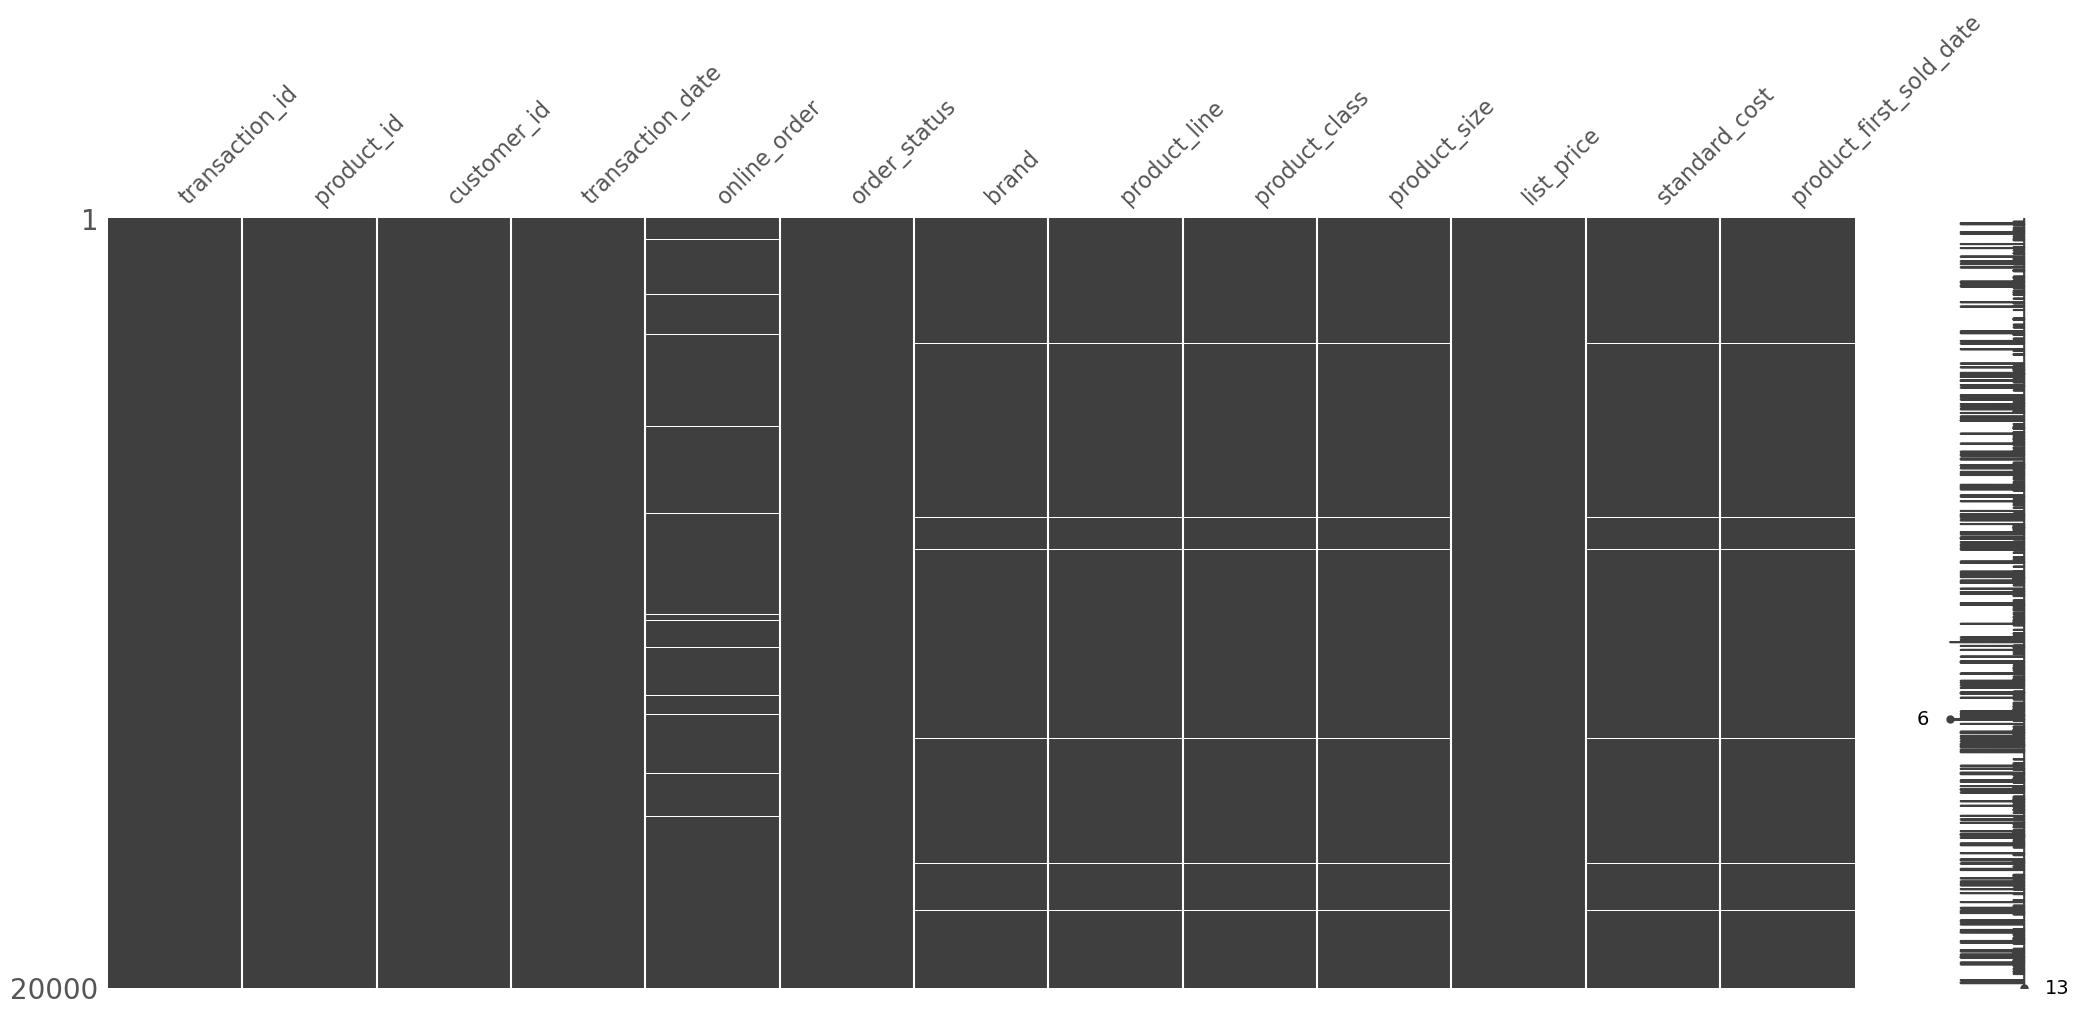

In [39]:
import missingno as msno 

msno.matrix(transaction_raw)
plt.show()

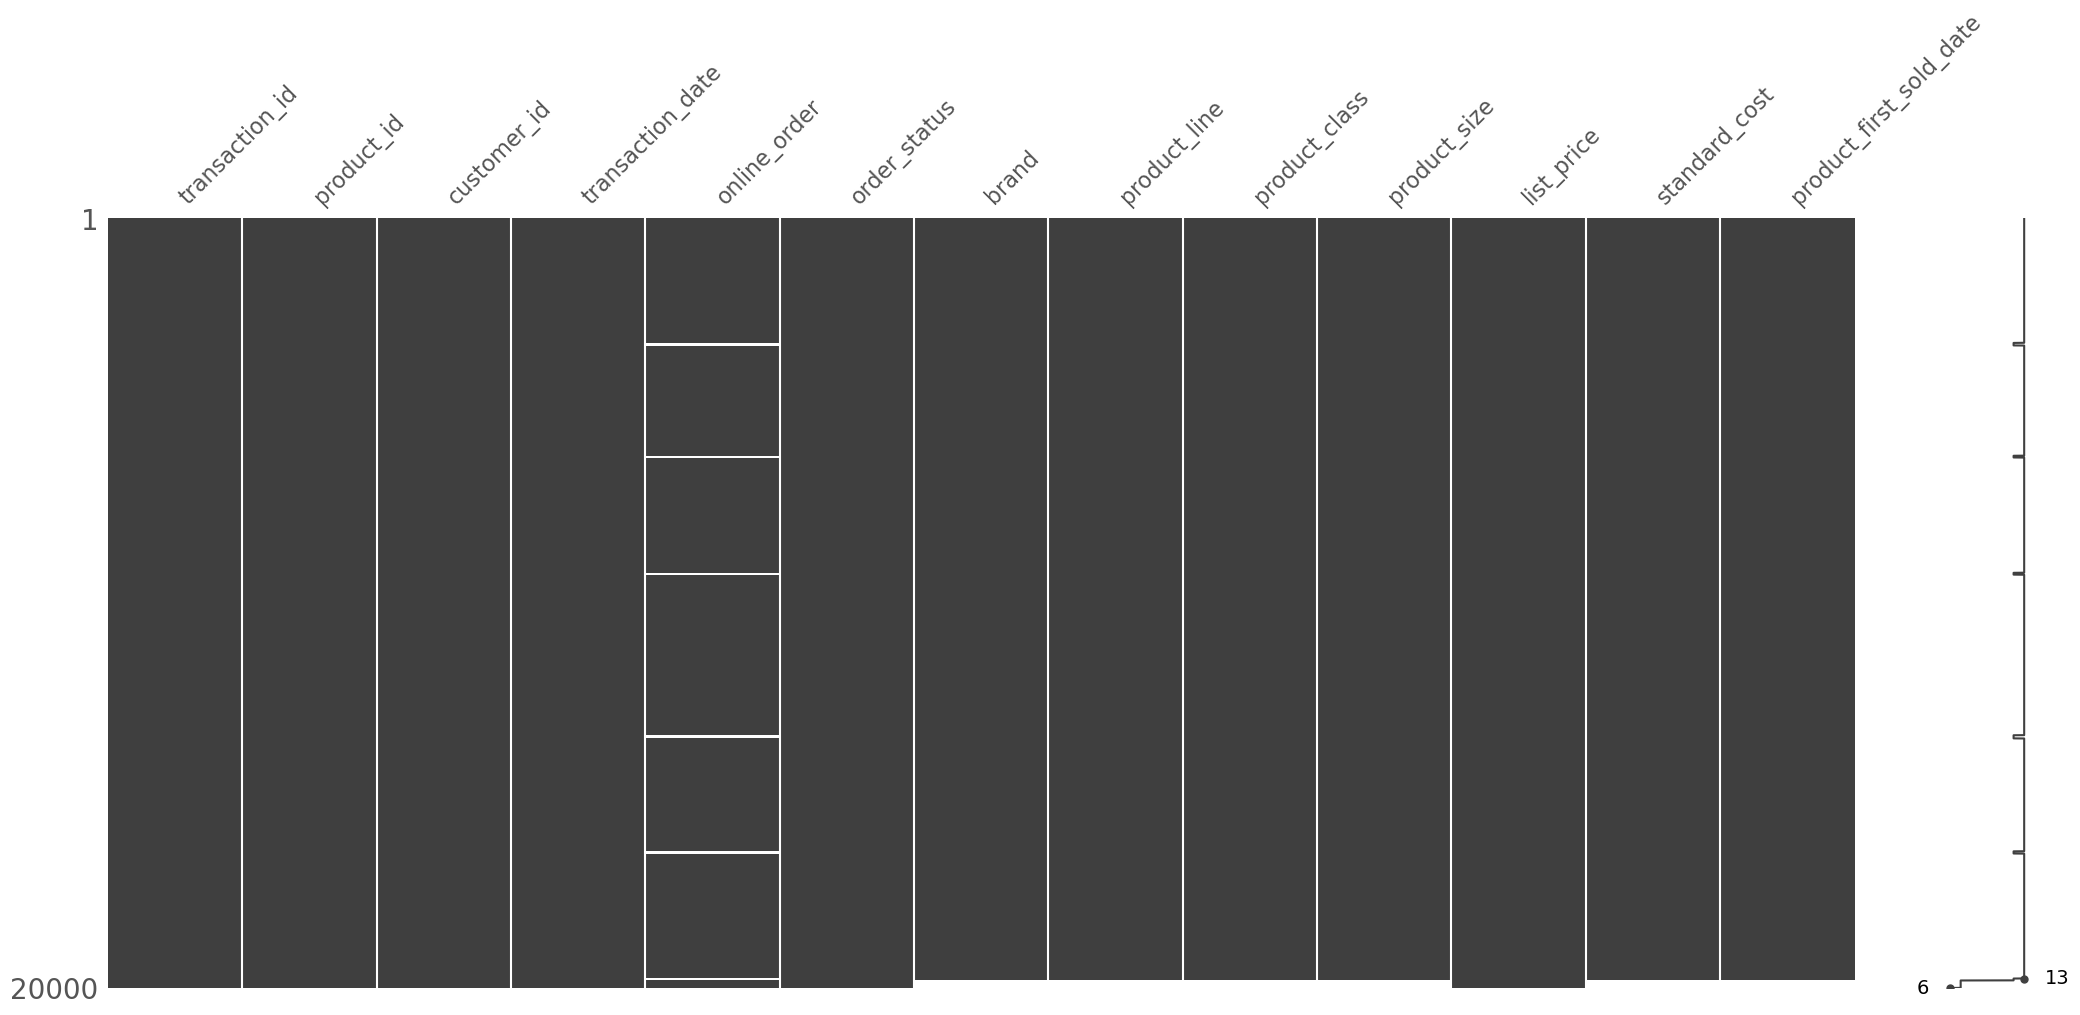

In [40]:
sorted_transaction = transaction_raw.sort_values(by = ['brand','online_order'])
msno.matrix(sorted_transaction)
plt.show()

The above graph clearly shows the distribution of missing values across all the features. the missing data is missing at random as there is a systematic relationship between the missing data and the other observed values.

In [41]:

transaction = transaction_raw.copy()

transaction_complete = transaction.dropna(subset = ['online_order','brand'])
transaction_complete.isna().sum()
# dropping all the missing values 

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

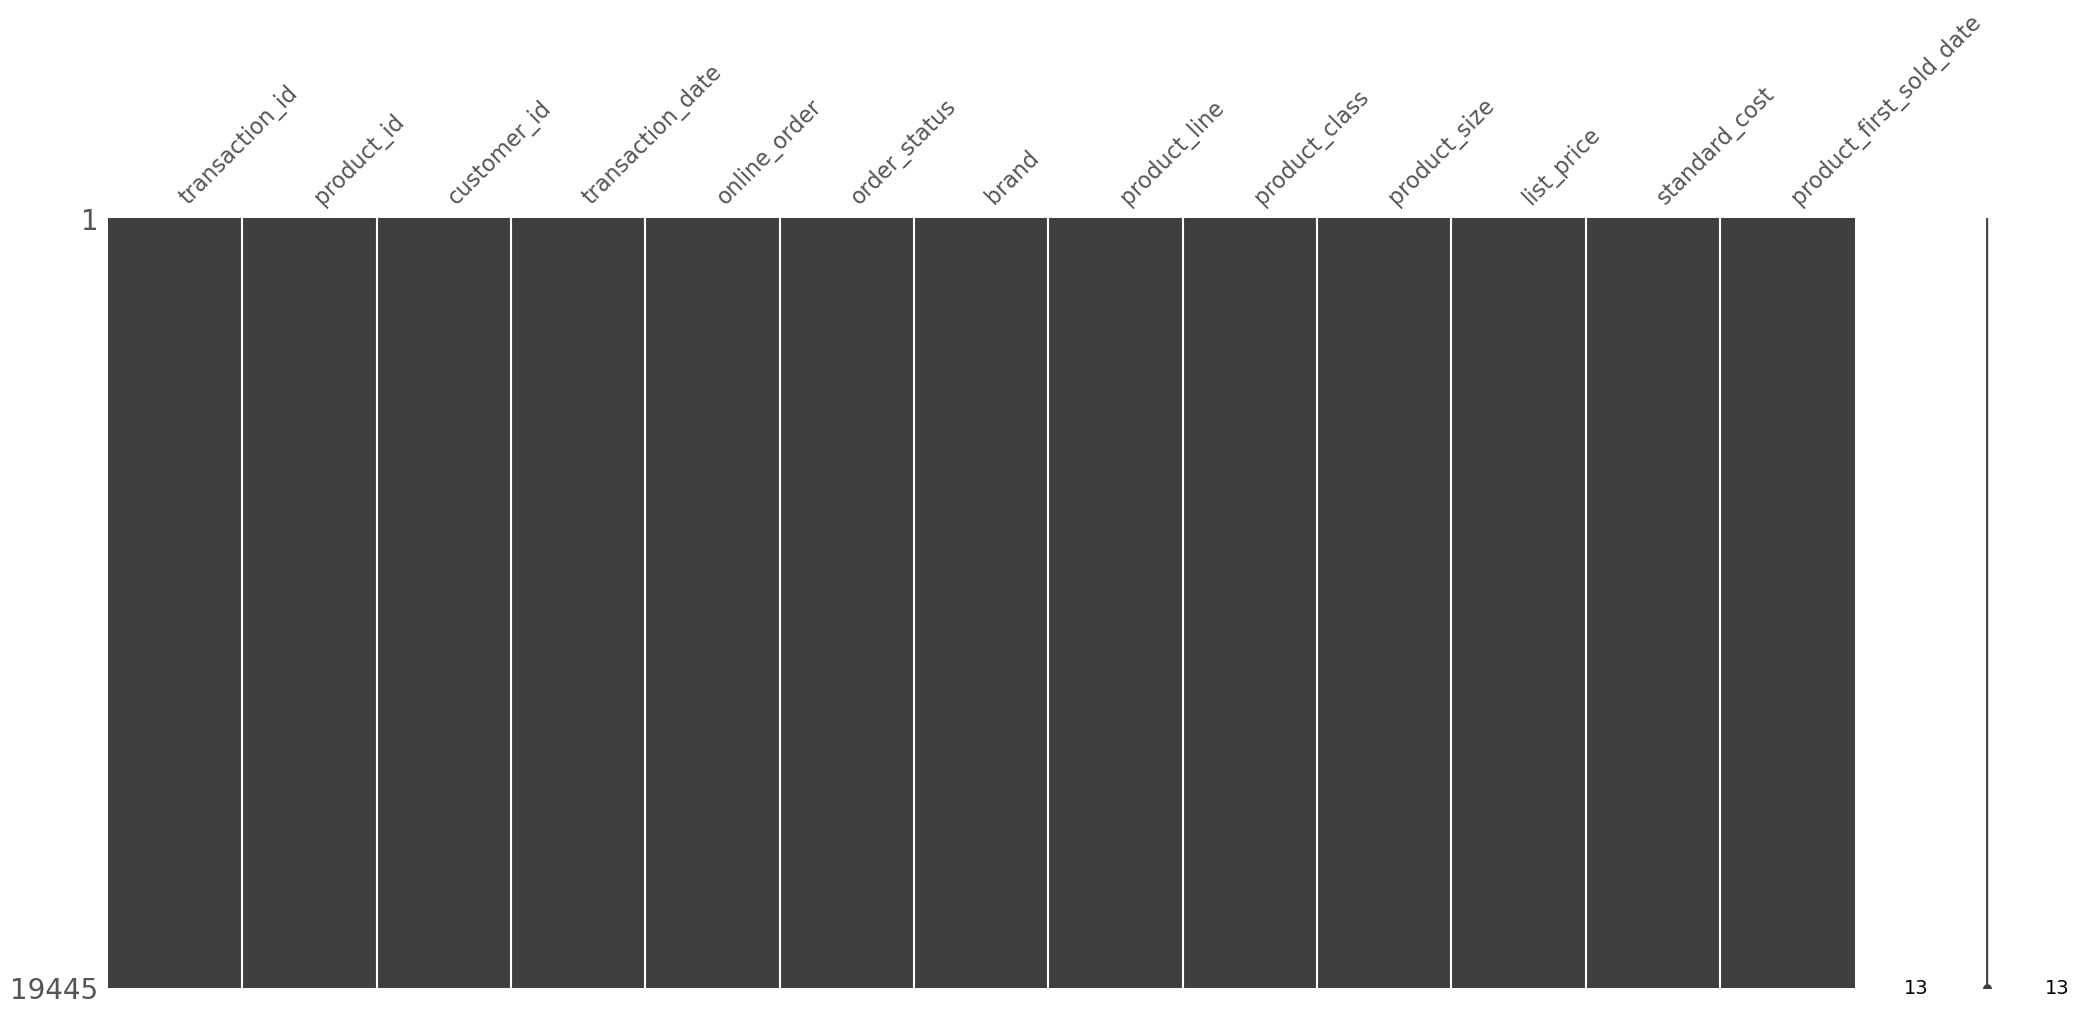

In [42]:
msno.matrix(transaction_complete)
plt.show()

All the missing values are hence removed.

In [43]:
transaction_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  category      
 5   order_status             19445 non-null  category      
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  category      
 8   product_class            19445 non-null  category      
 9   product_size             19445 non-null  category      
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [44]:
transaction_complete.describe(include = 'all')

C:\Users\Bidee\AppData\Local\Temp\ipykernel_9556\830729945.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transaction_complete.describe(include = 'all')
C:\Users\Bidee\AppData\Local\Temp\ipykernel_9556\830729945.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transaction_complete.describe(include = 'all')


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,19445.000000,19445.000000,19445.000000,19445,19445.0,19445,19445,19445,19445,19445,19445.000000,19445.000000,19445
unique,NaN,NaN,NaN,364,2.0,2,6,4,3,3,NaN,NaN,100
top,NaN,NaN,NaN,2017-08-18 00:00:00,1.0,Approved,Solex,Standard,medium,medium,NaN,NaN,1992-10-02 00:00:00
freq,NaN,NaN,NaN,81,9739.0,19273,4169,13920,13587,12767,NaN,NaN,230
first,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991-01-21 00:00:00
last,NaN,NaN,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-06 00:00:00
mean,9989.257393,45.797737,1739.467267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1107.337193,555.585260,NaN
std,5779.669087,30.571996,1011.889153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,582.662400,405.596541,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,NaN
25%,4976.000000,18.000000,857.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,NaN


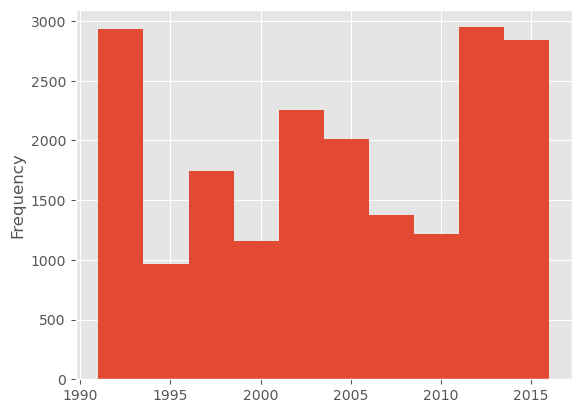

In [45]:
# checking the last column(product_first_sold_date)
import datetime as dt
date_year = transaction_complete['product_first_sold_date'].dt.year
date_year.plot(kind = 'hist')
plt.show()
#transaction_complete['product_first_sold_date'].plot(kind = 'hist')

This histogram shows the frequency of products sold in the past 25 years

## 3. checking values free from contradiction

After analysisng the dataset the only contradictory part is the list_price and the standard_cost, standard_cost seems </br>
lower for every product as compared to it's list_price

all other checkpoints 4,5,6 are already passed while doing our data cleaning till now so we can directly jump to our last case </br>
that is data uniqueness

## 7. Data Uniqueness (checking for duplicates)

In [46]:
is_duplicates = transaction_complete.duplicated(keep = False)
is_duplicates.value_counts()

False    19445
dtype: int64

so we can see there are no duplicate records so all passed.

## Repeating the same steps with the other 2 datasets , CustomerDemographic , CustomerAddress

In [47]:
customerDemo_raw

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3995,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3996,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3997,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [48]:
customerDemo_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3999 non-null   int64         
 1   first_name                           3999 non-null   object        
 2   last_name                            3874 non-null   object        
 3   gender                               3999 non-null   object        
 4   past_3_years_bike_related_purchases  3999 non-null   int64         
 5   DOB                                  3912 non-null   datetime64[ns]
 6   job_title                            3493 non-null   object        
 7   job_industry_category                3343 non-null   object        
 8   wealth_segment                       3999 non-null   object        
 9   deceased_indicator                   3999 non-null   object        
 10  default     

In [49]:
customerDemo_raw.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                301
owns_car                                 0
tenure                                  87
dtype: int64

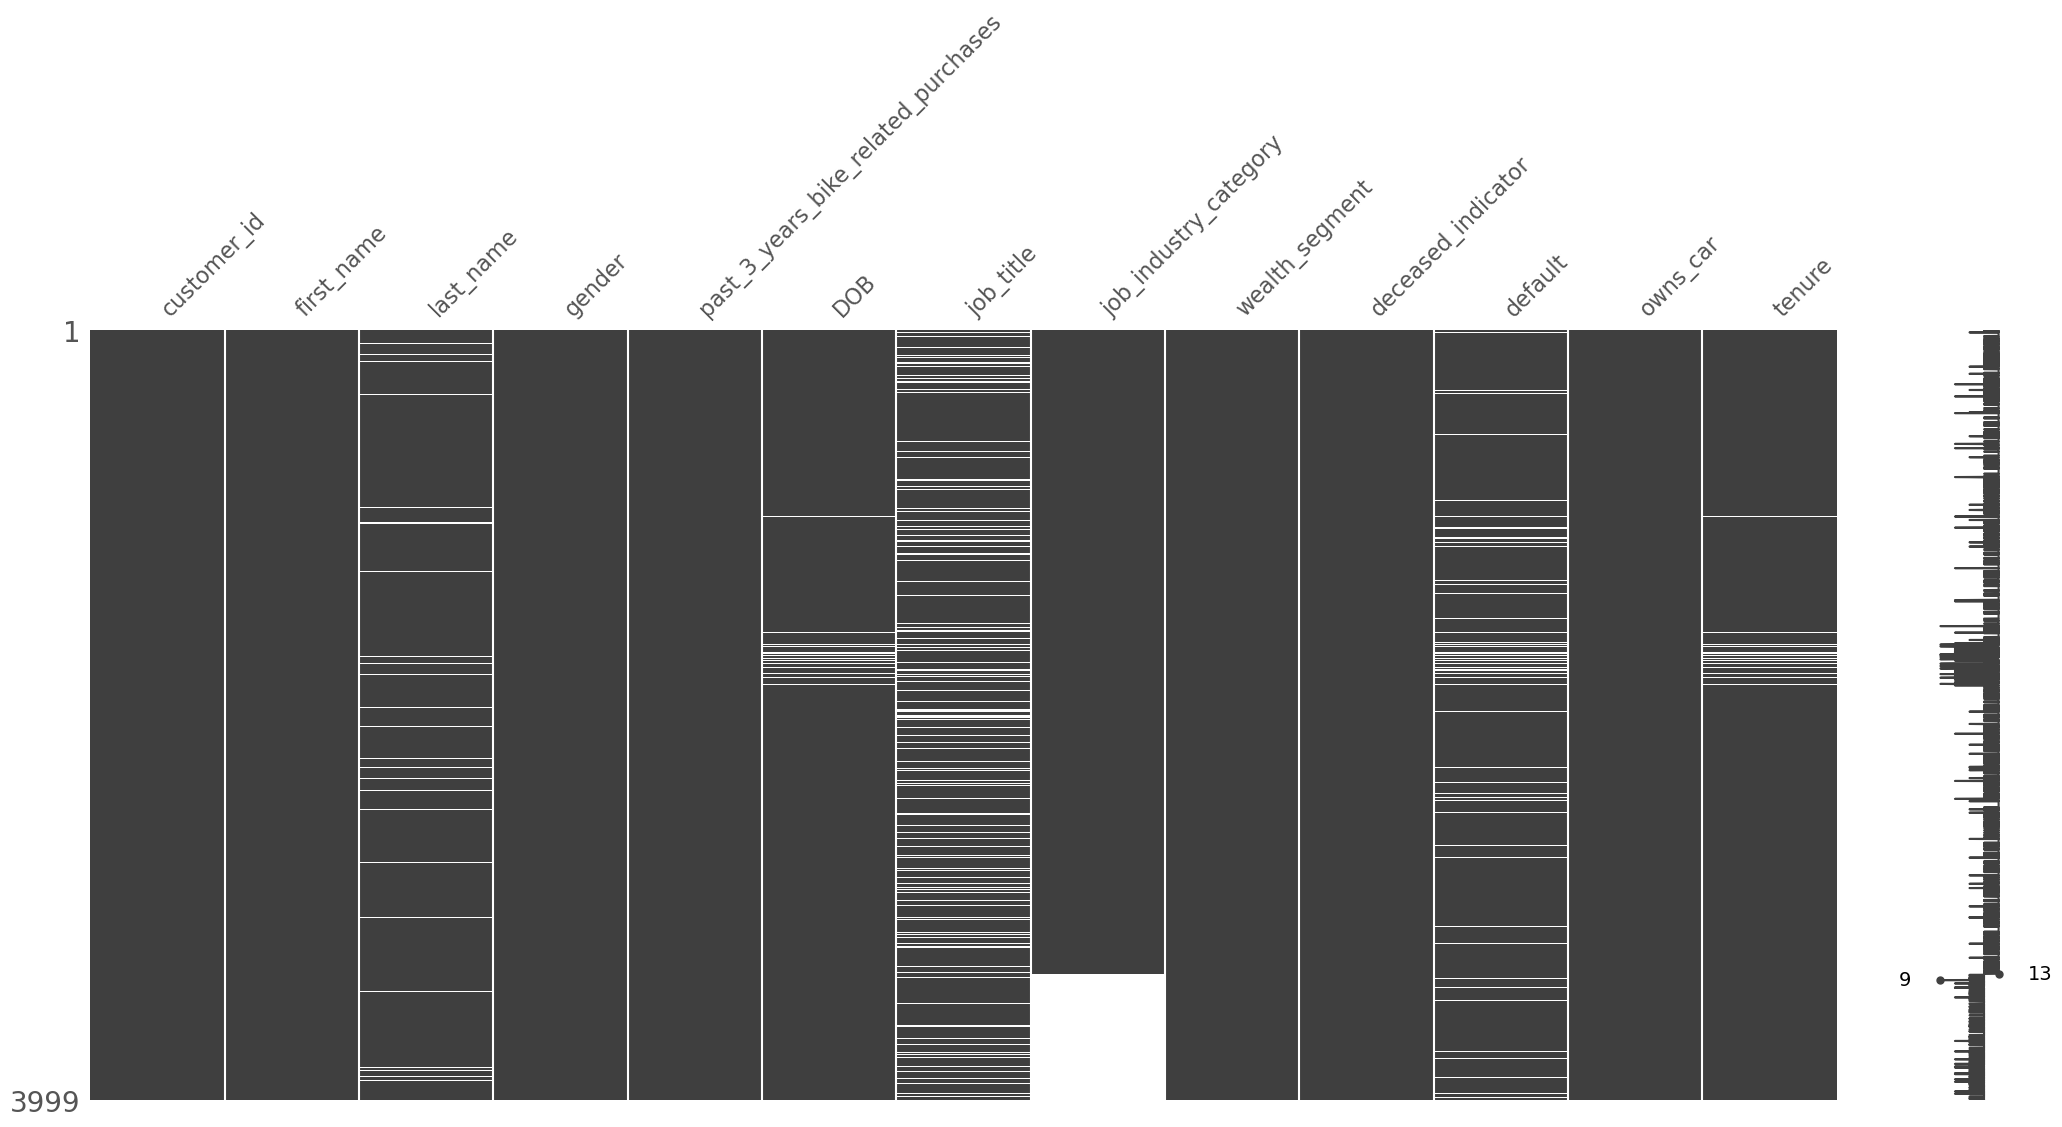

In [50]:
msno.matrix(customerDemo_raw.sort_values(by = ['job_industry_category']))
plt.show()

In this dataset the missing values are distributed as shown above, now we are going to drop them.

In [51]:
# dropping the 'default' column as it is not required
customerDemo_raw.drop(axis = 1,columns = 'default',inplace = True)
customerDemo_raw

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0
3995,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0
3996,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,No,NaN
3997,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes,10.0


In [52]:
customerDemo_complete = customerDemo_raw.copy()

customerDemo_complete = customerDemo_complete.dropna(subset = ['job_industry_category','job_title','DOB','last_name'])
customerDemo_complete.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

😃👍 Done.

In [53]:
customerDemo_complete.set_index('customer_id').sample(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
customer_id,,,,,,,,,,,
952,Marina,Andresen,Female,34,1971-06-13,VP Sales,Financial Services,Affluent Customer,N,Yes,6.0
2662,Louisette,Cullimore,Female,53,1977-12-21,Accountant IV,Property,Mass Customer,N,Yes,16.0
3063,Andrea,Wildber,Male,74,1999-11-04,VP Sales,Financial Services,Affluent Customer,N,No,2.0
797,Meridel,Rawet,Female,51,1973-10-20,Internal Auditor,Financial Services,Mass Customer,N,No,19.0
1458,Ashley,Behneke,Male,40,1956-10-22,Account Representative IV,Telecommunications,Affluent Customer,N,No,11.0


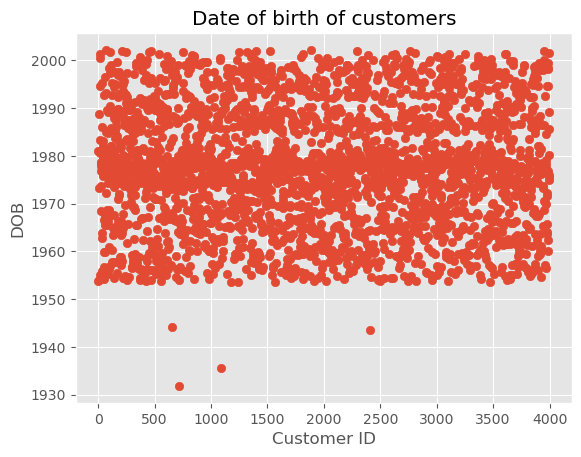

In [54]:
plt.scatter(customerDemo_complete['customer_id'],customerDemo_complete['DOB'])
plt.xlabel('Customer ID')
plt.ylabel('DOB')
plt.title('Date of birth of customers')
plt.show()


In [55]:
duplicates = customerDemo_complete.duplicated()
duplicates.value_counts()
# so here are no duplicates either

False    2779
dtype: int64

In [56]:
customerDemo_complete['gender'].value_counts()

Female    1444
Male      1333
F            1
Femal        1
Name: gender, dtype: int64

In [57]:
customerDemo_complete['gender'] = customerDemo_complete['gender'].str.replace('Femal','F')
customerDemo_complete['gender'].value_counts()

Fe      1444
Male    1333
F          2
Name: gender, dtype: int64

In [58]:
customerDemo_complete['gender'] = customerDemo_complete['gender'].str.replace('Fe','F')
customerDemo_complete['gender'] = customerDemo_complete['gender'].str.replace('Male','M')
customerDemo_complete['gender'].value_counts()

F    1446
M    1333
Name: gender, dtype: int64

In [59]:
#gender = customerDemo_raw['gender'].unique()
bike_related_purchase = customerDemo_complete.groupby('gender')['past_3_years_bike_related_purchases'].sum()
bike_related_purchase

gender
F    70013
M    67398
Name: past_3_years_bike_related_purchases, dtype: int64

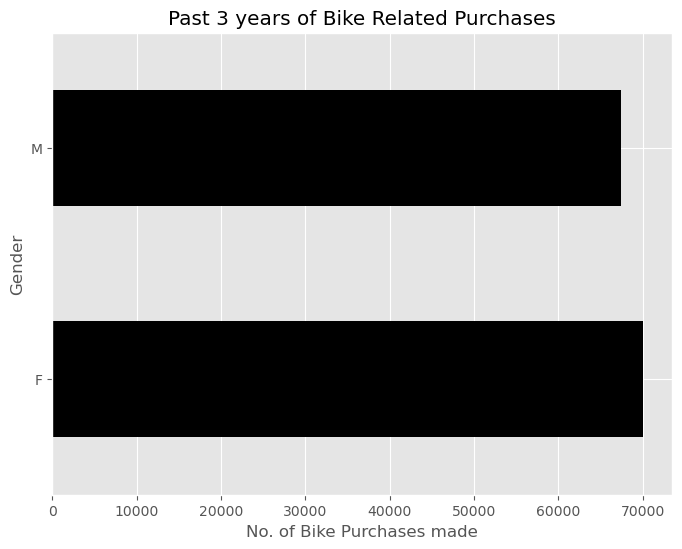

In [60]:
plt.figure(figsize=(8, 6))
ax = bike_related_purchase.plot(kind = 'barh',color = 'black')
ax.set_xlabel('No. of Bike Purchases made')
ax.set_ylabel('Gender')
ax.set_title('Past 3 years of Bike Related Purchases')
plt.show()


From the above graph it can be inferred that number of bike purchases are mostly done by Females 🚴‍♀️(with a total of 70013 purchases made) </br> 
followed by males 🚴‍♂️(with a total of 67398)

### Now looking at the last Dataset before we merge them all

In [61]:
cust_Address_raw.sample(5)

,customer_id,address,postcode,state,country,property_valuation
1786,1791,613 Mayfield Trail,4012,QLD,Australia,6
1753,1758,4 5th Circle,2800,NSW,Australia,2
1908,1913,81856 Express Lane,2299,NSW,Australia,6
1058,1063,6988 Acker Crossing,2217,NSW,Australia,10
1486,1491,15012 Oneill Plaza,2285,NSW,Australia,5


In [62]:
cust_Address_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [63]:
cust_Address_raw.isna().sum()
# there are no missing data in this dataset

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [64]:
cust_Address_raw.describe(include = 'all')

,customer_id,address,postcode,state,country,property_valuation
count,3999.000000,3999,3999.000000,3999,3999,3999.000000
unique,NaN,3996,NaN,5,1,NaN
top,NaN,3 Mariners Cove Terrace,NaN,NSW,Australia,NaN
freq,NaN,2,NaN,2054,3999,NaN
mean,2003.987997,NaN,2985.755939,NaN,NaN,7.514379
std,1154.576912,NaN,844.878364,NaN,NaN,2.824663
min,1.000000,NaN,2000.000000,NaN,NaN,1.000000
25%,1004.500000,NaN,2200.000000,NaN,NaN,6.000000
50%,2004.000000,NaN,2768.000000,NaN,NaN,8.000000
75%,3003.500000,NaN,3750.000000,NaN,NaN,10.000000


In [65]:
transaction_complete
customerDemo_complete
cust_Address_raw

customer_trxn_half = transaction_complete.merge(customerDemo_complete, on = 'customer_id', how = 'left')
customer_trxn = customer_trxn_half.merge(cust_Address_raw, on = 'customer_id', how = 'left')
customer_trxn.sample(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
16222,16690,78,1378,2017-04-26,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,3831 Paget Road,3163.0,VIC,Australia,6.0
7011,7191,5,2484,2017-12-06,0.0,Approved,Trek Bicycles,Mountain,low,medium,...,Property,Mass Customer,N,Yes,14.0,0 Union Plaza,2444.0,NSW,Australia,7.0
606,623,94,2156,2017-03-01,0.0,Approved,Giant Bicycles,Standard,medium,large,...,Retail,Mass Customer,N,Yes,18.0,13852 Burning Wood Terrace,2199.0,NSW,Australia,1.0
2699,2761,7,877,2017-02-15,0.0,Approved,Trek Bicycles,Road,low,medium,...,Financial Services,Mass Customer,N,Yes,3.0,029 Springview Place,2177.0,NSW,Australia,8.0
1574,1614,29,635,2017-07-25,0.0,Approved,Norco Bicycles,Road,medium,medium,...,NaN,NaN,NaN,NaN,NaN,165 Petterle Place,2145.0,NSW,Australia,8.0
8157,8377,17,1725,2017-04-01,1.0,Approved,WeareA2B,Touring,medium,large,...,Manufacturing,High Net Worth,N,Yes,16.0,2 Mcguire Terrace,2323.0,NSW,Australia,7.0
14750,15172,76,2371,2017-09-28,0.0,Approved,WeareA2B,Road,low,small,...,Manufacturing,High Net Worth,N,Yes,8.0,03 Clarendon Way,2099.0,NSW,Australia,10.0
3801,3880,20,193,2017-01-23,1.0,Approved,Trek Bicycles,Standard,medium,small,...,Manufacturing,Mass Customer,N,Yes,12.0,10878 Waywood Way,4352.0,QLD,Australia,7.0
6613,6784,3,1133,2017-02-24,1.0,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,7674 Roxbury Junction,4815.0,QLD,Australia,4.0
14161,14558,25,1891,2017-03-19,1.0,Approved,Giant Bicycles,Road,medium,medium,...,Retail,Mass Customer,N,Yes,19.0,5786 Kinsman Point,2127.0,NSW,Australia,8.0


In [66]:
customer_trxn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19444
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19445 non-null  int64         
 1   product_id                           19445 non-null  int64         
 2   customer_id                          19445 non-null  int64         
 3   transaction_date                     19445 non-null  datetime64[ns]
 4   online_order                         19445 non-null  category      
 5   order_status                         19445 non-null  category      
 6   brand                                19445 non-null  object        
 7   product_line                         19445 non-null  category      
 8   product_class                        19445 non-null  category      
 9   product_size                         19445 non-null  category      
 10  list_price

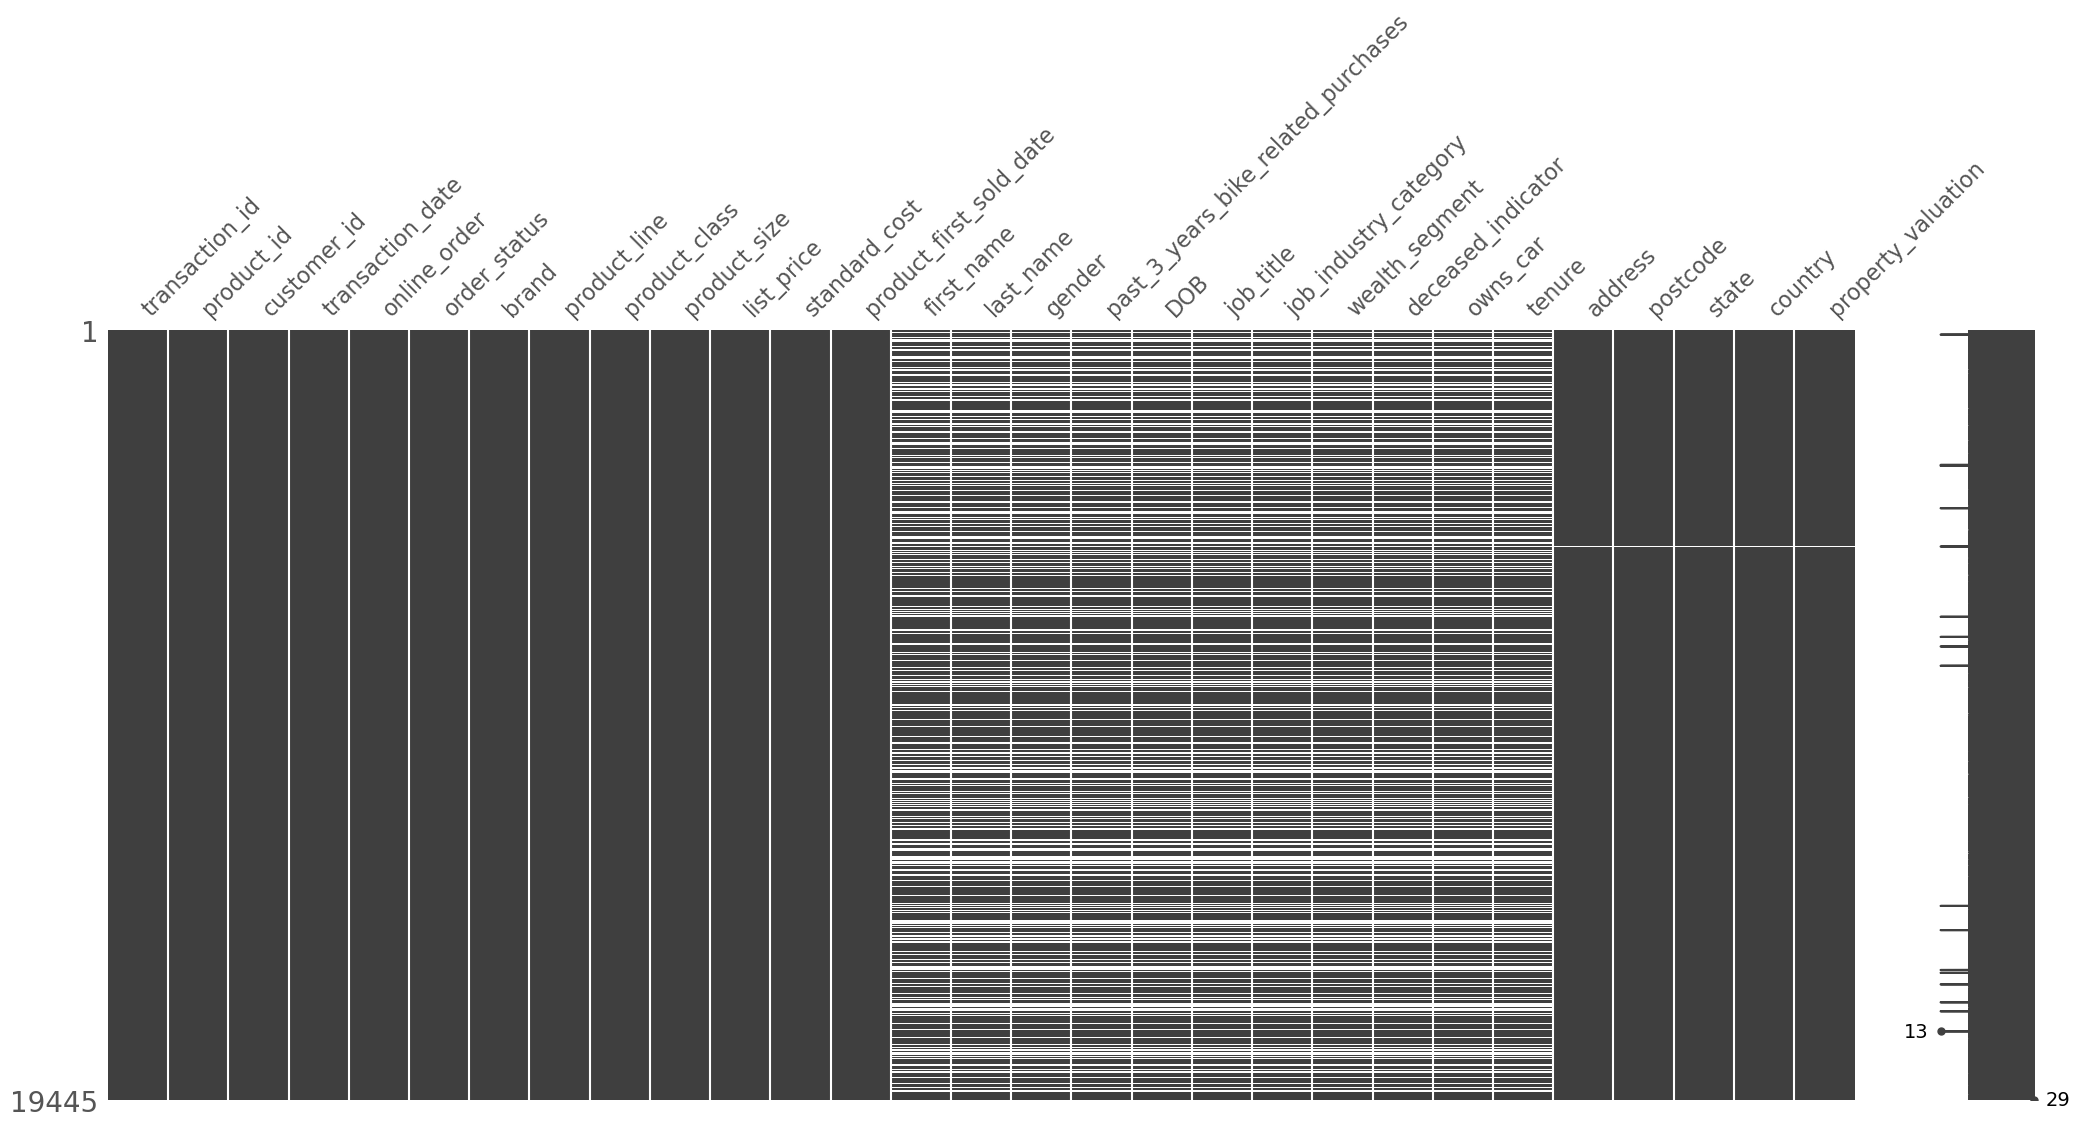

In [67]:
msno.matrix(customer_trxn)
plt.show()

Now we need to adjust the entire dataset by dropping the remaining null values :

In [68]:
customer_trxn_complete = customer_trxn.copy()

customer_trxn_complete = customer_trxn_complete.dropna(subset = ['first_name','last_name','address'])
customer_trxn_complete.isna().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address         

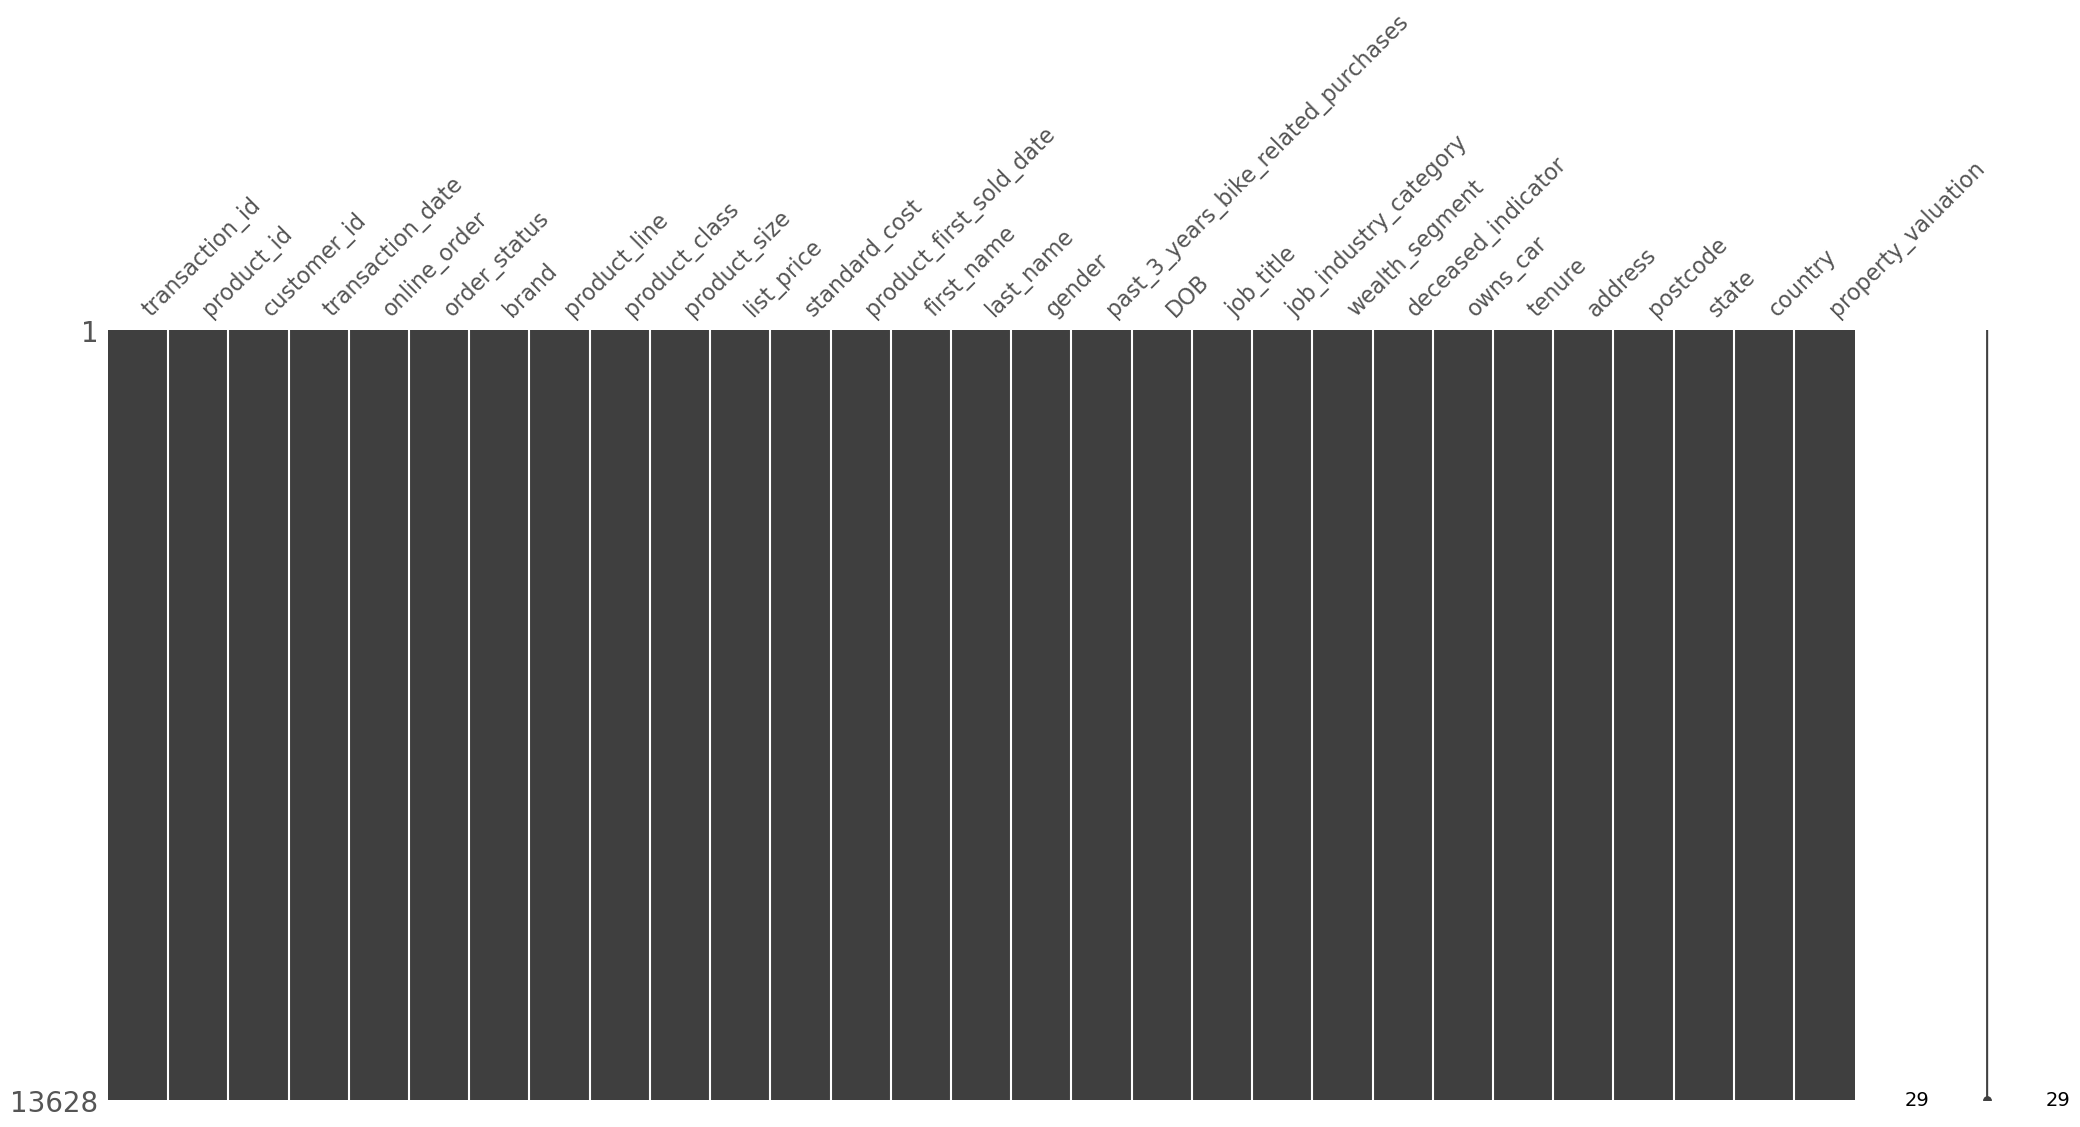

In [69]:
# let's check now again. 
msno.matrix(customer_trxn_complete)
plt.show()

Now all the missing values are removed . 🚴‍♂️🚴‍♂️🚴‍♂️🚴‍♀️🚴‍♀️🚴‍♀️

In [70]:
customer_trxn_complete['owns_car'].value_counts()

Yes    6901
No     6727
Name: owns_car, dtype: int64

SO, approximately we can say 50% of the subscribers own a car and also hiring bikes from Sprockets

In [71]:
#ax1 = sns.pairplot(customer_trxn_complete ,\
                   #vars =['list_price','product_id','customer_id'])
#plt.show()

In [72]:
customer_trxn.to_csv('Sprocket_customer_data.csv')